#### Data Analysis

In [1]:
import numpy as np
import pandas as pd

In [3]:
Data = pd.read_csv('human-resources-analytics/HR_comma_sep.csv')

In [4]:
Data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
columns = Data.columns.tolist()

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

In [10]:
categorical=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','sales','salary']

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

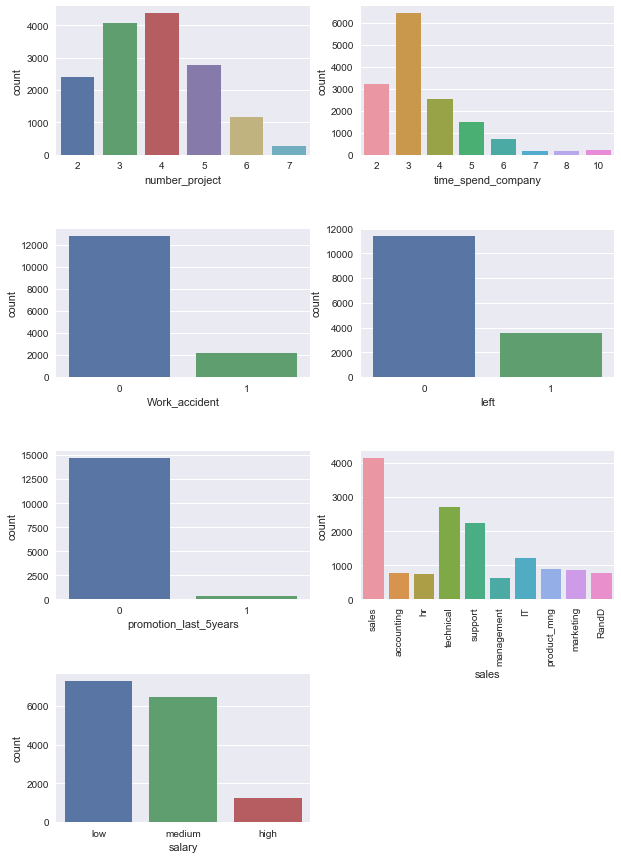

In [23]:
fig=plt.subplots(figsize=(10,15))
length=len(categorical)
for i,j in itertools.zip_longest(categorical,range(length)):
    #j+1 - gives the plot number
    plt.subplot(np.ceil(length/2),2,j+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x=i, data= Data)
    
plt.subplot(np.ceil(length/2),2,6)
plt.xticks(rotation=90)

In [27]:
len(Data[Data['left']==1])

3571

In [29]:
3571/14999

0.2380825388359224

#### Let's analyze the categorical & ordinal variable

In [30]:
# here we will do it only for categorical variable
categorical=['number_project','time_spend_company','Work_accident','promotion_last_5years','sales','salary']

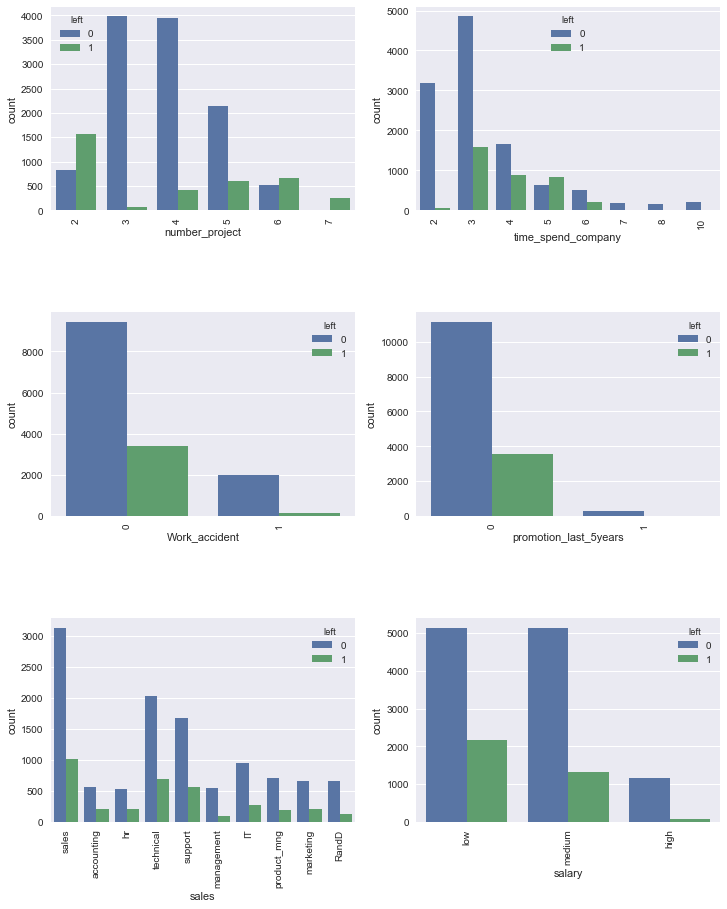

In [36]:
fig=plt.subplots(figsize=(12,15))
length = len(categorical)
for i,j in itertools.zip_longest(categorical,range(length)):
    plt.subplot(np.ceil(length/2),2,j+1)
    plt.subplots_adjust(hspace=.5)
    sns.countplot(x=i,data = Data,hue="left")
    plt.xticks(rotation=90)
    
    